# Processing of the TGA data

In [1]:
from spectrochempy import *
preferences.log_level = ERROR

SpectroChemPy's API - v.0.1a8.dev0+gbdf190e8.d20171230
© Copyright 2014-2017 - A.Travert and C.Fernandez @ LCS


First we read our project 

In [2]:
proj = Project.load('HIZECOKE')
proj

<IPython.core.display.Javascript object>


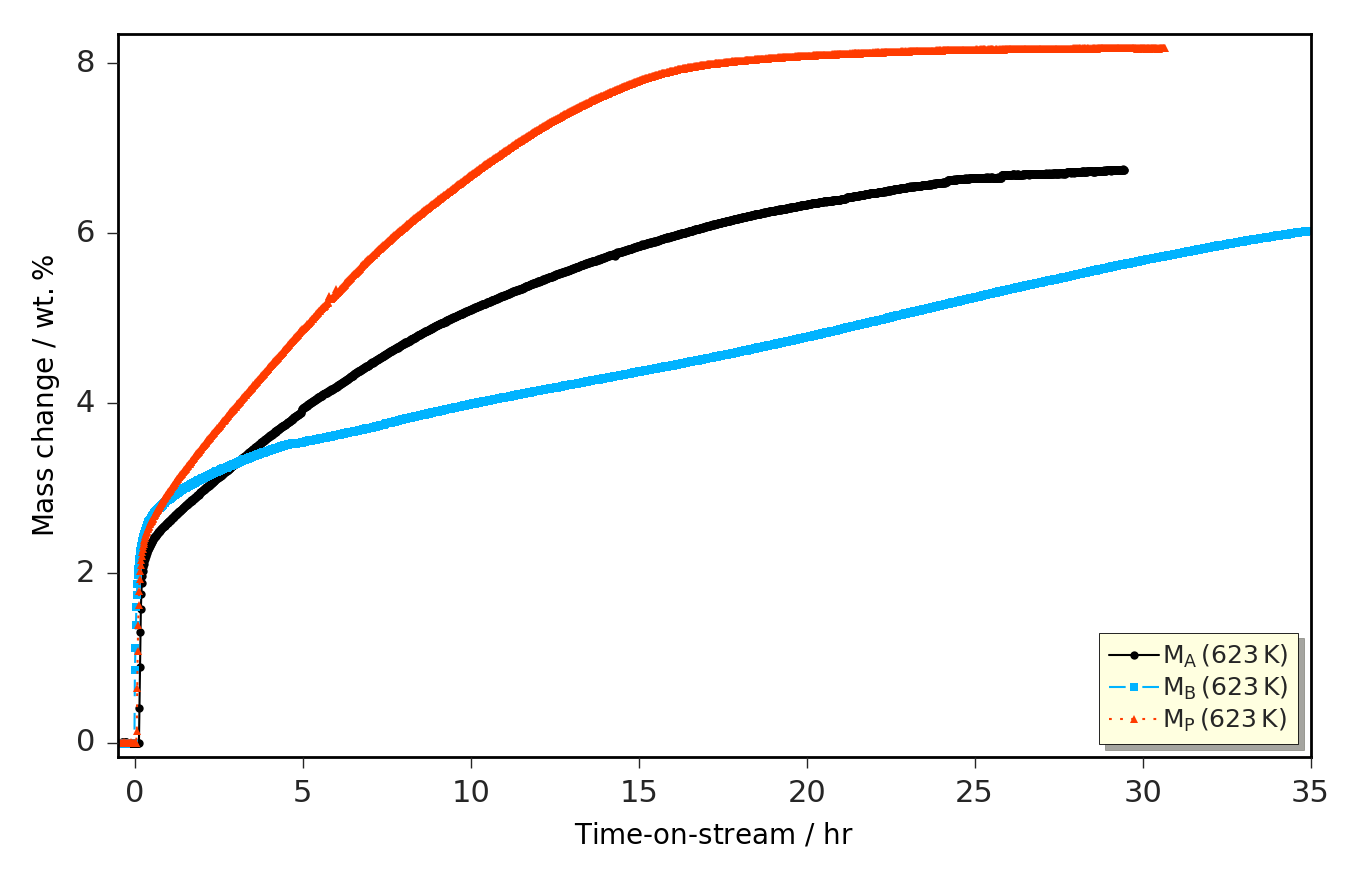

In [3]:
datasets =[]
labels = []
for p in proj.projects:
    datasets.append(p.TGA) 
    labels.append(p.label)
    
_ = plot_multiple(sources=datasets, labels=labels, lines=True, style='sans', 
                  markevery=1, markersize=3,
                  legend='lower right')

## Initial corrections of the TG data. 

We are interested by the gain in weight during the reaction. But, the zero in time is obviously not the same for all three samples. 

We will now correct this.

We fist display an expansion around the zero region

<IPython.core.display.Javascript object>


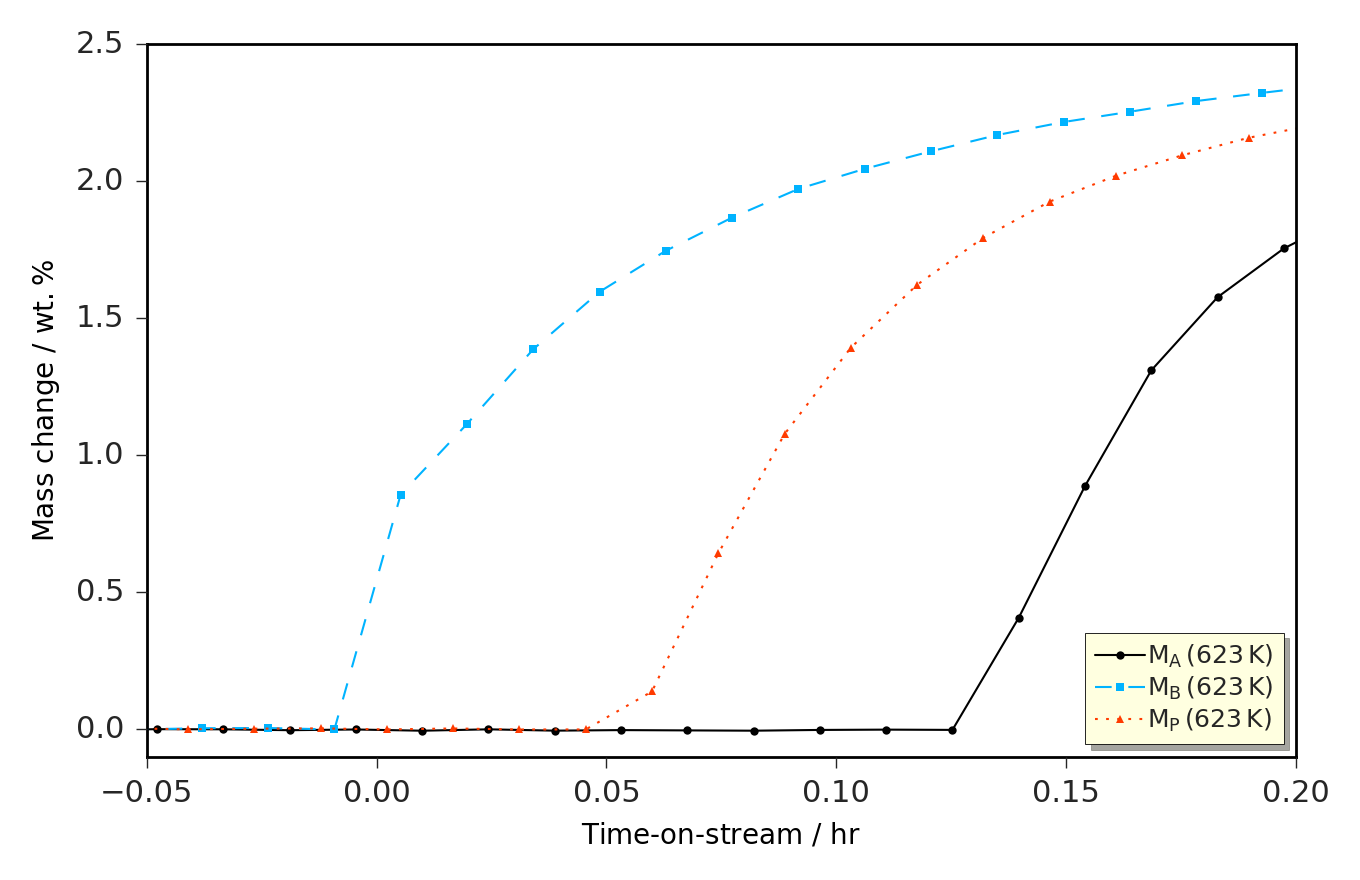

In [4]:
_ = plot_multiple(sources=datasets, labels=labels, lines=True, style='sans', 
                  markevery=1, markersize=3,
                  legend='lower right', xlim=(-0.05,0.2), ylim=(-.1, 2.5))

Now we correct the time origin for each sample separately, and mask data below 0 in time

In [5]:
proj.P350.TGA.x -= 0.0577 *ur.hour  # note the use of units as the x data have units!
proj.B350.TGA.x += 0.0093 *ur.hour
proj.A350.TGA.x -= 0.1253 *ur.hour

In [6]:
for p in proj.projects:
    p.TGA[-0.005:35.0, INPLACE]   # slicing to keep only data for x>0 
    # also set the first point to 0,0!
    p.TGA.x[0] = 0 * ur.hour
    p.TGA[0] = 0 * p.TGA.units
    
# finally we mask some data that seems not correct
#proj.B350.TGA[0.0147] = masked

<IPython.core.display.Javascript object>


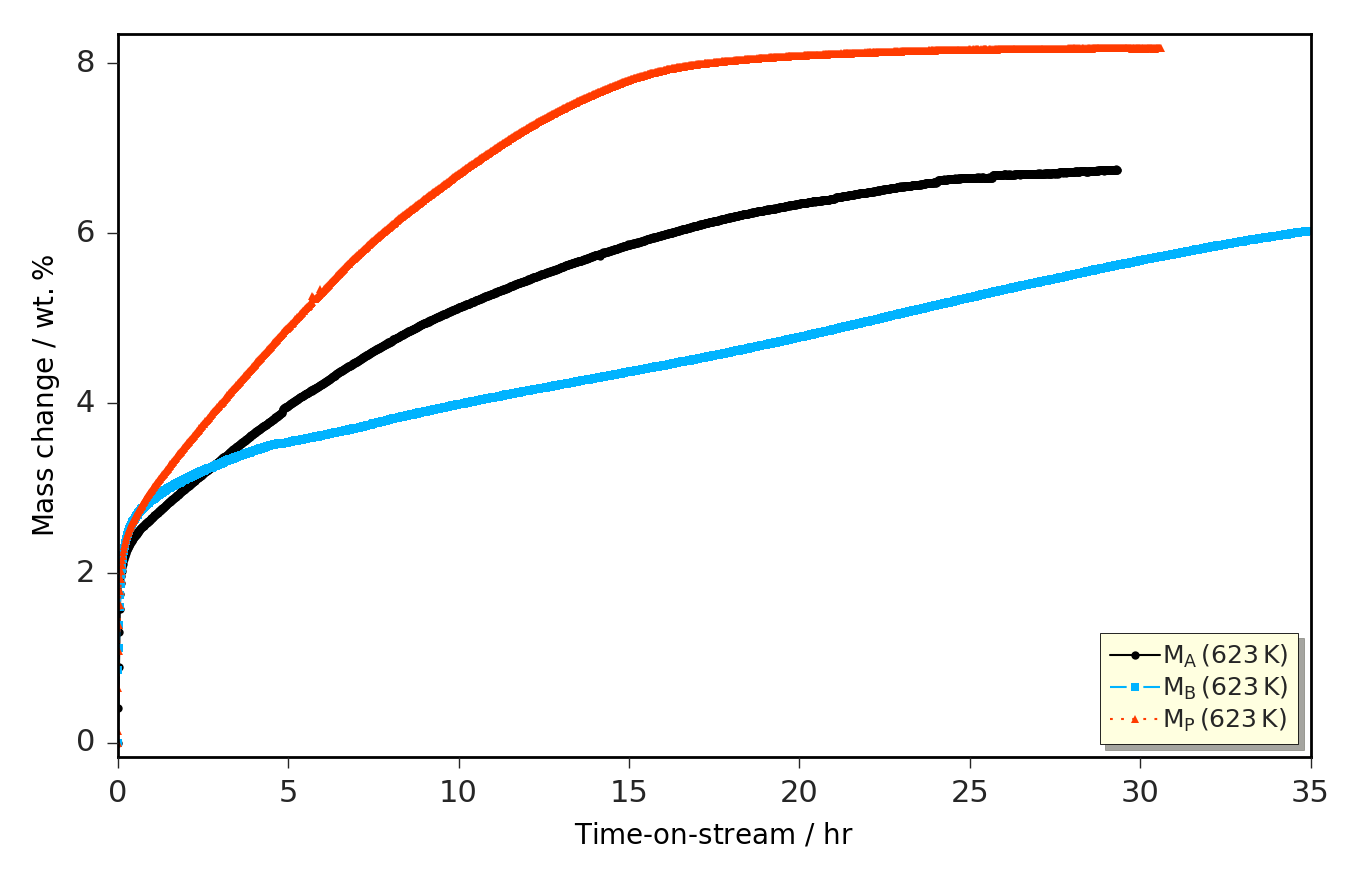

In [7]:
_ = plot_multiple(sources=datasets, labels=labels, lines=True, style='sans', 
                  markevery=1, markersize=3,
                  legend='lower right')

As in the preprocessing of IR data, let's store two script for displaying the data and make the intial preprocessing:

In [8]:
%%addscript -p proj -o preprocessTG 

proj.P350.TGA.x -= 0.0577 *ur.hour  # note the use of units as the x data have units!
proj.B350.TGA.x += 0.0093 *ur.hour
proj.A350.TGA.x -= 0.1253 *ur.hour
for p in proj.projects:
    p.TGA[-0.005:35.0, INPLACE]   # slicing to keep only data for x>0 
    # also set the first point to 0,0!
    p.TGA.x[0] = 0 * ur.hour
    p.TGA[0] = 0 * p.TGA.units

'Script preprocessTG created.'

In [9]:
proj.save('HIZECOKE', overwrite_data=False)